**Error Handling, Logging, and Data Manipulation Assignment**
:

Question 1 : What is the difference between multithreading and multiprocessing?

Ans:- There are several differences between multithreading and multiprocessing. Which are given below:-
1. Independance
- In multiprocessing, each process runs independently with its own memory space. Processes do not share memory by default, and communication between them requires explicit mechanisms such as inter-process communication (IPC).

- In multithreading, multiple threads share the same memory space within the single process. Threads can communicate more directly by accessing shared data.
2. Communication
- Communication between processes is typically achieved through IPC mechanisms like message passing, or file based communication.
- Threads can communicate more easily by sharing data directly, as they have access to the same memory space.
3. Fault Isolation
- Processes are more isolated, providing better fault isolation. If one process crashes, it does not necessarily affect others.
- Threads within the same process share the same memory space, making them more susceptible to issues such as data corruption or unintended interactions.
4. Resource utilization
- Can take advantage of multiple CPU cores, as each process can run on a separate core. Suitable for CPU-bound tasks.
- Suitable for I/O - bound tasks or tasks where parallelism can be achieved within a single process.
5. Concurrency
- Involves concurrent execution of multiple processes, each with its own program counter and resource.
- Involves concurrent execution of multiple threads within the same process, sharing the same program counter



Question 2: What are the challenges associated with memory management in Python?
Ans:- Python does automatic memory management using its garbage collector and reference counting, but it’s not perfect. Several challenges arise because of how memory is allocated, tracked, and released.
1. Reference Cycles
- Python uses reference counting to track how many variables refer to an object.

- If two or more objects reference each other (a circular reference), their reference counts never reach zero — meaning memory is not released automatically.

- Although Python’s garbage collector can detect such cycles, it doesn’t always clean them efficiently, especially if they involve objects with custom destructors (__del__ methods).

2. Memory Leaks
- Memory leaks occur when objects are no longer needed but not freed due to lingering references.

- This is common in long-running applications (like servers or data processing scripts).

- Causes include:

    Global variables or caches not cleared

    Circular references

    Improperly managed external resources (e.g., open file handles, sockets)

3. Fragmentation of Memory
- Python’s memory allocator (PyMalloc) can cause fragmentation, especially when objects of different sizes are created and deleted repeatedly.

- Over time, this can lead to inefficient use of memory — even if total usage seems small, Python might still hold onto large chunks of memory.

4. Large Object Retention
- Python sometimes keeps large objects alive longer than expected because:

    Variables remain in local/global scope.

    Containers (like lists, dicts) still hold references.

- This leads to high memory usage, especially in data-heavy tasks (NumPy, Pandas, etc.).


5. Garbage Collector Overhead
- Python’s garbage collector (GC) periodically checks for unreachable objects.


- In programs that create many short-lived objects (e.g., web servers), this can add performance overhead.


- Disabling or tuning GC (gc.disable(), gc.collect()) requires care — doing it incorrectly can lead to memory leaks.


6. External (Non-Python) Memory
- Python libraries written in C/C++ (like NumPy, TensorFlow) manage their own memory outside Python’s garbage collector.


- If not handled properly, these can lead to leaks even when Python objects are deleted because Python doesn’t automatically free the external memory buffer.


7. Threading and Memory
- In multi-threaded programs, Python’s Global Interpreter Lock (GIL) ensures thread safety but can complicate memory release timing.

- Some threads might hold onto memory longer due to delayed cleanup.


Question 3: Write a Python program that logs an error message to a log file when a division by zero exception occurs.

In [1]:
# Write a Python program that logs an error message to a log file when a division by zero exception occurs.


import logging

logging.basicConfig(
    filename='error_log.txt',
    level=logging.ERROR,
    format='%(asctime)s - %(levelname)s - %(message)s'
)

def divide_numbers(a, b):
    try:
        result = a / b
        print(f"Result: {result}")
    except ZeroDivisionError as e:
        logging.error("Division by zero error occurred.", exc_info=True)
        print("Error: Division by zero is not allowed!")


Question 4- Write a Python program that reads from one file and writes its content to another file.


In [3]:
# :Write a Python program that reads from one file and writes its content to another file.

def copy_file(source_file, destination_file):
    try:

        with open(source_file, 'r') as src:
            content = src.read()


        with open(destination_file, 'w') as dest:
            dest.write(content)

        print(f"Content copied successfully from '{source_file}' to '{destination_file}'")

    except FileNotFoundError:
        print(f"Error: The file '{source_file}' was not found.")
    except IOError:
        print("Error: An error occurred while reading or writing the file.")



Question 5: Write a program that handles both IndexError and KeyError using a try-except block.

In [9]:
# Write a program that handles both IndexError and KeyError using a try-except block.
def handle_errors():
    my_list = [10, 20, 30]
    my_dict = {"name": "John", "age": 25}

    try:

        print("List item:", my_list[5])
        print("Dictionary item:", my_dict["city"])

    except IndexError:
        print("Error: You tried to access an invalid index in the list.")
    except KeyError:
        print("Error: You tried to access a key that doesn't exist in the dictionary.")
    else:
        print("No error occurred!")
    finally:
        print("Program execution completed.")

Question 6: What are the differences between NumPy arrays and Python lists?

Ans- There are several differences between Numpy arreys and Python lists which are given below:-

1. Data types:
- Numpy arrays are Homogeneous- all elements must be of the same type.
- Python lists are hetrerogeneous- can contain different data types
2. performance
- Numpy arrays are much faster and more memory-efficient due to emplementation in C
- Python lists Slower because it's implementated in pure Python and stores elements as seperate objects.
3. Memory Usage
- Numpy array stores elements in contiguous memory blocks, making operations faster.
- Python lists stores references to objects, increasing memory overhead.
4. Mathematical Operations
- Numpy arrays supports vectorized operations
- Python lists requires explicit loops for element-wise operation
5. Functionality
- Numpy arrays comes with hundreads of built-in mathematical and statistical functions.
- Python lists only basic operations are available for advanced math
6. Dimensionality
- Numpy arrays can represent multi-dimentional data (1D, 2D, 3D, etc)
- Python lists primarily 1D; you can nest lists, but they are inefficient and irregular.
7. Broadcasting
- NUmpy arrays supports brodcasting - operations between arrays of different shapes automatically align.
- Python lists has no brodcasting - operations between lists must be of equal length.
8. Memory efficient
- Numpy arrays are more compact and uses less memory.
- Python lists consumes more memory due to object overhead,
9. Type conversion
- Numpy arrays elements automatically converted to a single data type.
- Python lists elements retain their original data types.

Question 7:Explain the difference between apply() and map() in Pandas.

Ans:- The apply() method allows you to apply a function along the axis of a dataframe or series. It is particularly useful for custome operations.

where the applymap() method is similar but works elements-wise on dataframes.

Question - 8 Create a histogram using Seaborn to visualize a distribution.

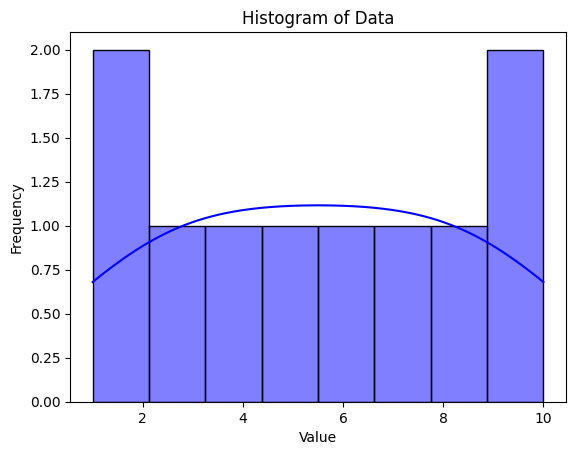

In [2]:
# Create a histogram using Seaborn to visualize a distribution
import seaborn as sns
import matplotlib.pyplot as plt

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

sns.histplot(data, bins=8, kde=True, color='blue')
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.show()


Question 9: Use Pandas to load a CSV file and display its first 5 rows.

In [ ]:
# Use Pandas to load a CSV file and display its first 5 rows
import pandas as pd
data = pd.read_csv("data.csv")
print("First 5 rows of the dataset:")
print(data.head())

Question 10: Calculate the correlation matrix using Seaborn and visualize it with a
heatmap.

corrrelation matrix:
                 age    salary  experience     score
age         1.000000  0.986137    0.973606  0.789346
salary      0.986137  1.000000    0.972208  0.762632
experience  0.973606  0.972208    1.000000  0.736460
score       0.789346  0.762632    0.736460  1.000000


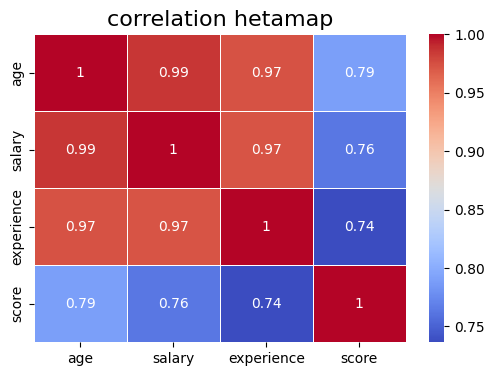

In [8]:
# Calculate the correlation matrix using Seaborn and visualize it with a heatmap

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "age" : [20, 19, 25, 28, 30, 35],
    "salary": [25000, 18000, 30000, 35000, 40000, 50000],
    "experience": [2, 1, 3, 8, 10, 14],
    "score": [50, 60, 70, 55, 80, 85]
}

df = pd.DataFrame(data)

corr = df.corr()

print("corrrelation matrix:")
print(corr)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("correlation hetamap", fontsize= 16)
plt.show()